# **Experiment Notebook 5**

### 0. Import Packages

In [1]:
import pandas as pd
import numpy as np
import glob
import altair as alt
from collections import Counter
import matplotlib.pyplot as plt
import warnings
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bank-data/final/transactions_2.csv
/kaggle/input/bank-data/final/transactions_33.csv
/kaggle/input/bank-data/final/transactions_91.csv
/kaggle/input/bank-data/final/transactions_50.csv
/kaggle/input/bank-data/final/transactions_51.csv
/kaggle/input/bank-data/final/transactions_60.csv
/kaggle/input/bank-data/final/transactions_75.csv
/kaggle/input/bank-data/final/transactions_95.csv
/kaggle/input/bank-data/final/transactions_126.csv
/kaggle/input/bank-data/final/transactions_69.csv
/kaggle/input/bank-data/final/transactions_127.csv
/kaggle/input/bank-data/final/transactions_55.csv
/kaggle/input/bank-data/final/transactions_81.csv
/kaggle/input/bank-data/final/transactions_26.csv
/kaggle/input/bank-data/final/transactions_121.csv
/kaggle/input/bank-data/final/transactions_63.csv
/kaggle/input/bank-data/final/transactions_70.csv
/kaggle/input/bank-data/final/transactions_19.csv
/kaggle/input/bank-data/final/transactions_71.csv
/kaggle/input/bank-data/final/transactions_74.cs

### 1.   Data Loading

In [2]:
directory_path = '/kaggle/input/bank-data/final'

In [3]:
transaction_files = glob.glob(f'{directory_path}/transactions_*.csv')

In [4]:
def concat_columns(row):
    return ','.join(map(str, row))

processed_dfs = []

for file_name in transaction_files:
    concatenated_rows = []
    
    with open(file_name, 'r') as file:
        for line in file:
            columns = line.strip().split(',')
            concatenated_row = concat_columns(columns)
            concatenated_rows.append(concatenated_row)
    df = pd.DataFrame(concatenated_rows, columns=['concatenated_column'])
    processed_dfs.append(df)
    

In [5]:
len(processed_dfs)

132

In [6]:
combined_df = pd.concat(processed_dfs, ignore_index=True)
combined_df

,concatenated_column
0,cc_num|acct_num|trans_num|unix_time|category|a...
1,180032174357488|790229857846|0a4c98ebb051e261c...
2,180032174357488|790229857846|a28189df860527740...
3,180032174357488|790229857846|c6c3ab5903a350552...
4,180032174357488|790229857846|05961e3f5b0554340...
...,...
4261031,3519712847818919|500229982535|b4fd4442cb015546...
4261032,3519712847818919|500229982535|bd9863f6e864130c...
4261033,3519712847818919|500229982535|3a738476c33c4eb9...
4261034,3519712847818919|500229982535|6cd299b37e890c4b...


In [7]:
split_df = combined_df['concatenated_column'].str.split('|', expand=True)
split_df

,0,1,2,3,4,5,6,7,8,9
0,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
1,180032174357488,790229857846,0a4c98ebb051e261cc9bfb6e613f1836,1561474903,gas_transport,83.57,0,Howard and Sons,40.266129,-73.331157
2,180032174357488,790229857846,a28189df860527740af3659d5ecd388c,1571490659,grocery_pos,49.35,0,Thomas-Harmon,41.241958,-74.315249
3,180032174357488,790229857846,c6c3ab5903a35055218c2d230c46b9ce,1550168294,gas_transport,71.08,0,Stone-Mcdonald,41.6617,-74.40638
4,180032174357488,790229857846,05961e3f5b0554340229d8782111626c,1552668951,gas_transport,42.14,0,"Ward, Ferrell and Ward",39.828078,-74.410418
...,...,...,...,...,...,...,...,...,...,...
4261031,3519712847818919,500229982535,b4fd4442cb01554618e76c9ba983f14d,1659879624,kids_pets,2.62,0,"Fox, Watts and Bowman",34.919506,-77.680559
4261032,3519712847818919,500229982535,bd9863f6e864130c806346506b959f2c,1659257094,kids_pets,2.32,0,Weber-Hanson,35.405033,-78.110351
4261033,3519712847818919,500229982535,3a738476c33c4eb9cb80d3a85b534634,1610699031,shopping_pos,568.13,0,Marshall Group,36.549067,-77.580453
4261034,3519712847818919,500229982535,6cd299b37e890c4b4ae8e9caa12237d7,1656581841,kids_pets,4.95,0,"Maldonado, Smith and Young",35.356964,-78.659657


In [8]:
split_df.columns = ['cc_num', 'acct_num', 'trans_num', 'unix_time', 'category', 'amt', 'is_fraud', 'merchant', 'lat', 'long']
split_df = split_df.drop(index=0)

In [9]:
split_df.head()

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,lat,long
1,180032174357488,790229857846,0a4c98ebb051e261cc9bfb6e613f1836,1561474903,gas_transport,83.57,0,Howard and Sons,40.266129,-73.331157
2,180032174357488,790229857846,a28189df860527740af3659d5ecd388c,1571490659,grocery_pos,49.35,0,Thomas-Harmon,41.241958,-74.315249
3,180032174357488,790229857846,c6c3ab5903a35055218c2d230c46b9ce,1550168294,gas_transport,71.08,0,Stone-Mcdonald,41.6617,-74.40638
4,180032174357488,790229857846,05961e3f5b0554340229d8782111626c,1552668951,gas_transport,42.14,0,"Ward, Ferrell and Ward",39.828078,-74.410418
5,180032174357488,790229857846,e01ce2b309474c4a7f97cbdedab26e7e,1554572400,gas_transport,63.92,0,"Clark, Boyd and Rosales",40.651339,-73.964047


In [10]:
file_path = '/kaggle/input/bank-data/final/customers.csv'
cus_df = pd.read_csv(file_path, delimiter='|')

In [11]:
cus_df.head()

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,acct_num
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,888022315787
1,715-55-5575,4351161559407816183,Elaine,Fuller,F,310 Kendra Common Apt. 164,Leland,NC,28451,34.2680,-78.0578,27112,Professor Emeritus,1963-06-07,917558277935
2,167-48-5821,4192832764832,Michael,Cameron,M,05641 Robin Port,Cordova,SC,29039,33.4275,-80.8857,4215,International aid/development worker,1973-05-30,718172762479
3,406-83-7518,4238849696532874,Brandon,Williams,M,26916 Carlson Mountain,Birmingham,AL,35242,33.3813,-86.7046,493806,Seismic interpreter,1942-12-26,947268892251
4,697-93-1877,4514627048281480,Lisa,Hernandez,F,809 Burns Creek,Fargo,GA,31631,30.7166,-82.5801,559,Medical laboratory scientific officer,1939-05-22,888335239225


In [12]:
cus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ssn       1000 non-null   object 
 1   cc_num    1000 non-null   int64  
 2   first     1000 non-null   object 
 3   last      1000 non-null   object 
 4   gender    1000 non-null   object 
 5   street    1000 non-null   object 
 6   city      1000 non-null   object 
 7   state     1000 non-null   object 
 8   zip       1000 non-null   int64  
 9   lat       1000 non-null   float64
 10  long      1000 non-null   float64
 11  city_pop  1000 non-null   int64  
 12  job       1000 non-null   object 
 13  dob       1000 non-null   object 
 14  acct_num  1000 non-null   int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 117.3+ KB


### 2. Data Exploration

In [13]:
split_df.shape

(4261035, 10)

In [14]:
split_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4261035 entries, 1 to 4261035
Data columns (total 10 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   cc_num     object
 1   acct_num   object
 2   trans_num  object
 3   unix_time  object
 4   category   object
 5   amt        object
 6   is_fraud   object
 7   merchant   object
 8   lat        object
 9   long       object
dtypes: object(10)
memory usage: 325.1+ MB


In [15]:
split_df['cc_num'] = pd.to_numeric(split_df['cc_num'], errors='coerce')
split_df['acct_num'] = pd.to_numeric(split_df['acct_num'], errors='coerce')
split_df['amt'] = pd.to_numeric(split_df['amt'], errors='coerce')
split_df['lat'] = pd.to_numeric(split_df['lat'], errors='coerce')
split_df['long'] = pd.to_numeric(split_df['long'], errors='coerce')
split_df['unix_time'] = pd.to_numeric(split_df['unix_time'], errors='coerce')
split_df['is_fraud'] = pd.to_numeric(split_df['is_fraud'], errors='coerce')

In [16]:
split_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4261035 entries, 1 to 4261035
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   cc_num     float64
 1   acct_num   float64
 2   trans_num  object 
 3   unix_time  float64
 4   category   object 
 5   amt        float64
 6   is_fraud   float64
 7   merchant   object 
 8   lat        float64
 9   long       float64
dtypes: float64(7), object(3)
memory usage: 325.1+ MB


In [17]:
split_df = pd.merge(split_df, cus_df, on='cc_num', how='inner')

In [18]:
split_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4108383 entries, 0 to 4108382
Data columns (total 24 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cc_num      float64
 1   acct_num_x  float64
 2   trans_num   object 
 3   unix_time   float64
 4   category    object 
 5   amt         float64
 6   is_fraud    float64
 7   merchant    object 
 8   lat_x       float64
 9   long_x      float64
 10  ssn         object 
 11  first       object 
 12  last        object 
 13  gender      object 
 14  street      object 
 15  city        object 
 16  state       object 
 17  zip         int64  
 18  lat_y       float64
 19  long_y      float64
 20  city_pop    int64  
 21  job         object 
 22  dob         object 
 23  acct_num_y  int64  
dtypes: float64(9), int64(3), object(12)
memory usage: 752.3+ MB


In [19]:
split_df.duplicated().values.any()

False

In [20]:
split_df = split_df.drop_duplicates()

In [21]:
split_df.isnull().values.any()

False

In [22]:
split_df.nunique()

cc_num            951
acct_num_x        951
trans_num     4108383
unix_time     3972112
category           14
amt             80162
is_fraud            2
merchant        21977
lat_x         3649100
long_x        3896552
ssn               951
first             361
last              471
gender              2
street            951
city              707
state              51
zip               910
lat_y             910
long_y            908
city_pop          740
job               501
dob               932
acct_num_y        951
dtype: int64

In [23]:
split_df['dob'] = pd.to_datetime(split_df['dob'], infer_datetime_format=True)
today = pd.to_datetime('today')
split_df['Age'] = ((today - split_df['dob']).dt.total_seconds() // (365.25 * 24 * 3600)).astype(int)

/tmp/ipykernel_33/2656966886.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  split_df['dob'] = pd.to_datetime(split_df['dob'], infer_datetime_format=True)


In [24]:
print(split_df['is_fraud'].value_counts())

is_fraud
0.0    4103540
1.0       4843
Name: count, dtype: int64


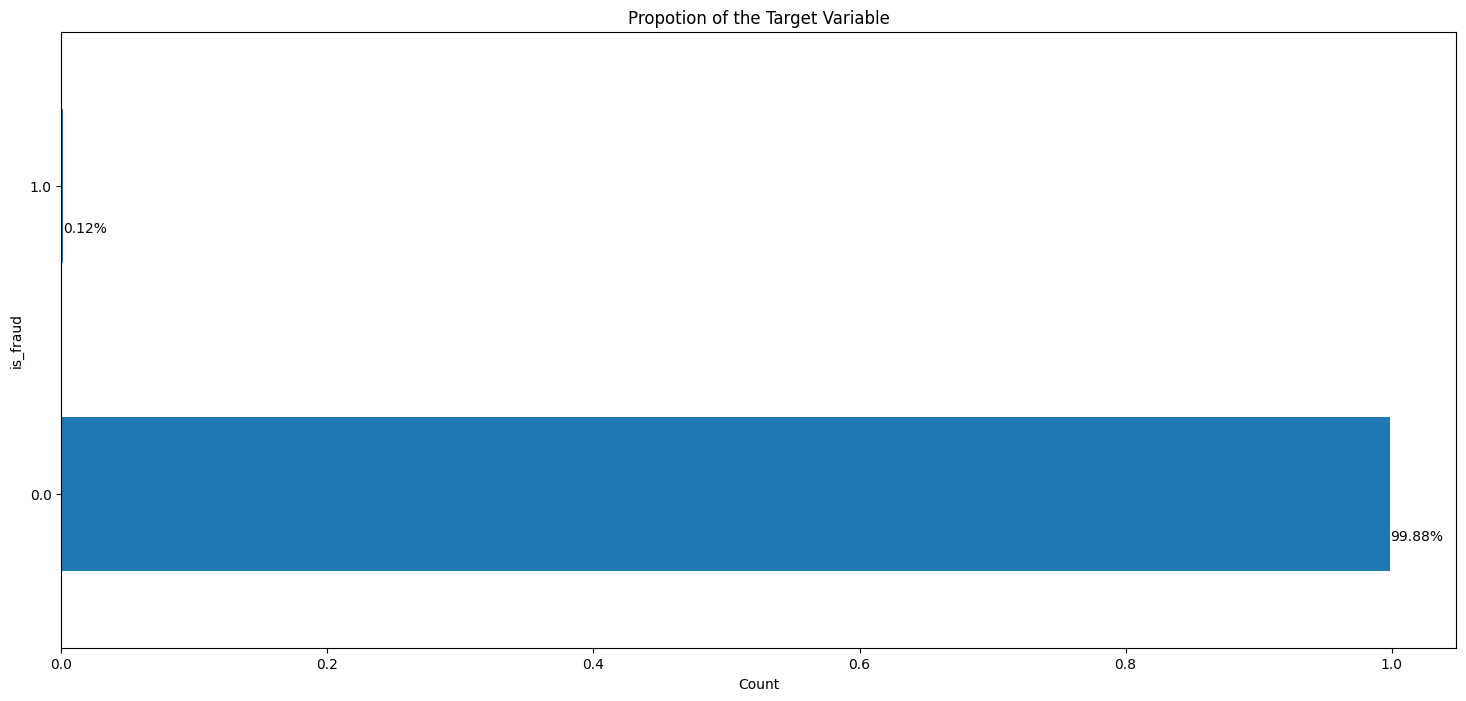

is_fraud
0.0    99.882119
1.0     0.117881
Name: proportion, dtype: float64


is_fraud
0.0    4103540
1.0       4843
Name: count, dtype: int64

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (18,8))
ax = split_df["is_fraud"].value_counts(normalize=True).plot(kind = "barh")
plt.xlabel("Count")
plt.ylabel("is_fraud")
plt.title("Propotion of the Target Variable")

for p in ax.patches:
    percentage = '{:.2f}%'.format(p.get_width() * 100)
    ax.annotate(percentage, (p.get_x() + p.get_width(), p.get_y() + 0.1))

plt.show()

class_percentages = split_df["is_fraud"].value_counts(normalize=True) * 100
print(class_percentages)

split_df["is_fraud"].value_counts()

### 3. Data Preparation

Text(0.5, 1.0, 'Frequency of Transactions by Category')

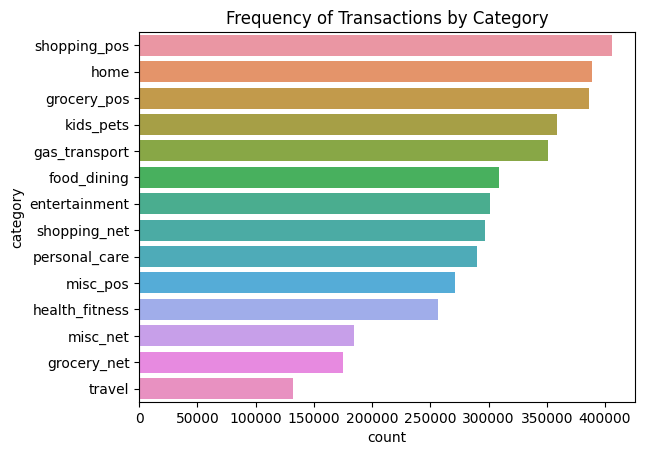

In [26]:
plt.plot(16, 10)
sns.countplot(y='category', data=split_df, order=split_df['category'].value_counts().index)
plt.title('Frequency of Transactions by Category')

In [27]:
# plt.figure(figsize=(10, 8))
# sns.scatterplot(x='long', y='lat', data=split_df, hue='is_fraud', palette={0: 'blue', 1: 'red'}, alpha=0.5)
# plt.title('Geographic Distribution of Transactions')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.show()

Text(0.5, 1.0, 'Transaction Amount by Fraud Status')

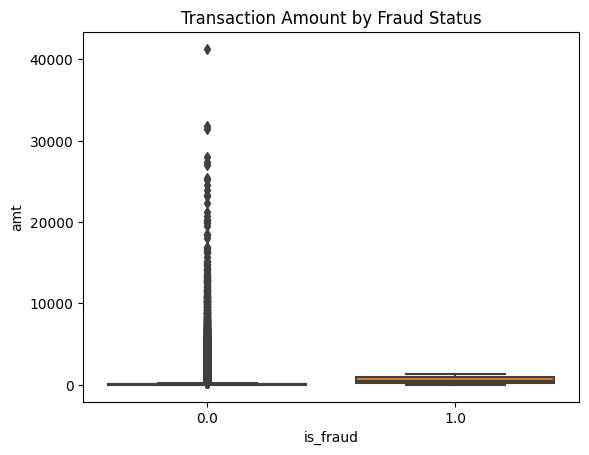

In [28]:
plt.plot(16, 10)
sns.boxplot(x='is_fraud', y='amt', data=split_df)
plt.title('Transaction Amount by Fraud Status')


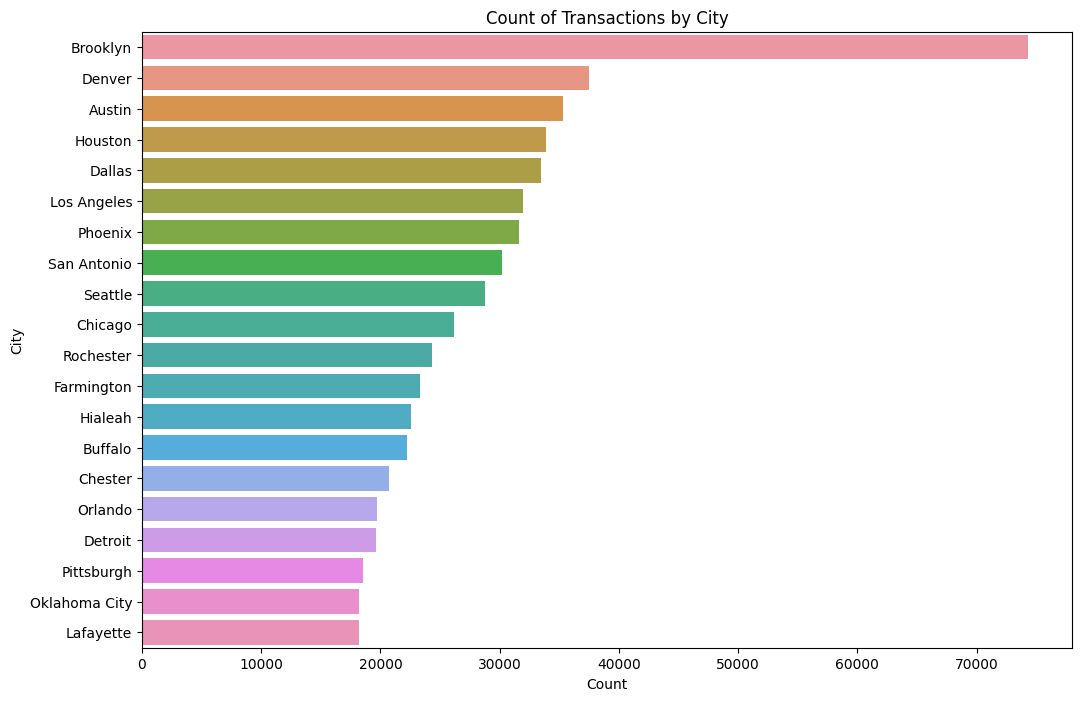

In [29]:
top_cities = split_df['city'].value_counts().nlargest(20).index
plt.figure(figsize=(12, 8))
sns.countplot(y='city', data=split_df[split_df['city'].isin(top_cities)], order=top_cities)
plt.title('Count of Transactions by City')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()

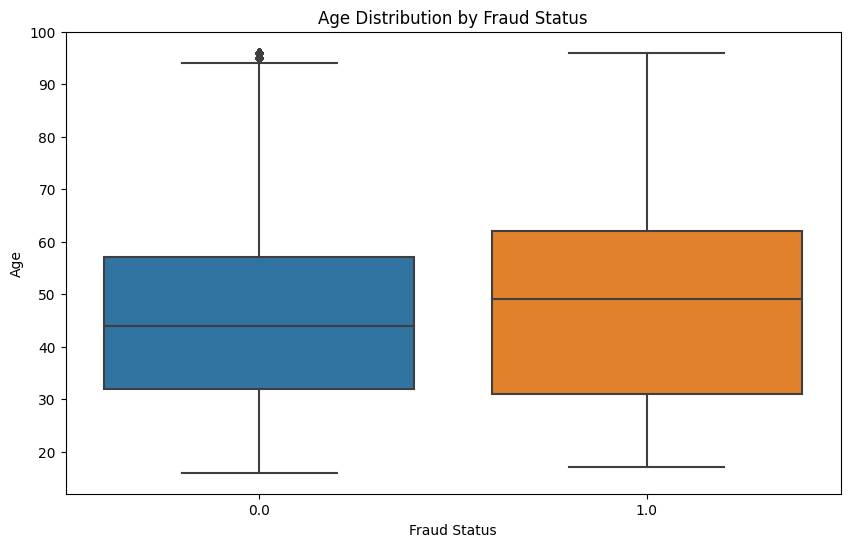

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='Age', data=split_df)
plt.title('Age Distribution by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Age')
plt.show()


In [31]:
split_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4108383 entries, 0 to 4108382
Data columns (total 25 columns):
 #   Column      Dtype         
---  ------      -----         
 0   cc_num      float64       
 1   acct_num_x  float64       
 2   trans_num   object        
 3   unix_time   float64       
 4   category    object        
 5   amt         float64       
 6   is_fraud    float64       
 7   merchant    object        
 8   lat_x       float64       
 9   long_x      float64       
 10  ssn         object        
 11  first       object        
 12  last        object        
 13  gender      object        
 14  street      object        
 15  city        object        
 16  state       object        
 17  zip         int64         
 18  lat_y       float64       
 19  long_y      float64       
 20  city_pop    int64         
 21  job         object        
 22  dob         datetime64[ns]
 23  acct_num_y  int64         
 24  Age         int64         
dtypes: datetime64[ns](

In [32]:
split_df.nunique()

cc_num            951
acct_num_x        951
trans_num     4108383
unix_time     3972112
category           14
amt             80162
is_fraud            2
merchant        21977
lat_x         3649100
long_x        3896552
ssn               951
first             361
last              471
gender              2
street            951
city              707
state              51
zip               910
lat_y             910
long_y            908
city_pop          740
job               501
dob               932
acct_num_y        951
Age                81
dtype: int64

In [33]:
split_df = pd.get_dummies(data = split_df, columns = ['category'], dtype = int)
split_df.head()

,cc_num,acct_num_x,trans_num,unix_time,amt,is_fraud,merchant,lat_x,long_x,ssn,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,1.800322e+14,7.902299e+11,0a4c98ebb051e261cc9bfb6e613f1836,1.561475e+09,83.57,0.0,Howard and Sons,40.266129,-73.331157,047-20-5764,...,0,0,0,0,0,0,0,0,0,0
1,1.800322e+14,7.902299e+11,a28189df860527740af3659d5ecd388c,1.571491e+09,49.35,0.0,Thomas-Harmon,41.241958,-74.315249,047-20-5764,...,1,0,0,0,0,0,0,0,0,0
2,1.800322e+14,7.902299e+11,c6c3ab5903a35055218c2d230c46b9ce,1.550168e+09,71.08,0.0,Stone-Mcdonald,41.661700,-74.406380,047-20-5764,...,0,0,0,0,0,0,0,0,0,0
3,1.800322e+14,7.902299e+11,05961e3f5b0554340229d8782111626c,1.552669e+09,42.14,0.0,"Ward, Ferrell and Ward",39.828078,-74.410418,047-20-5764,...,0,0,0,0,0,0,0,0,0,0
4,1.800322e+14,7.902299e+11,e01ce2b309474c4a7f97cbdedab26e7e,1.554572e+09,63.92,0.0,"Clark, Boyd and Rosales",40.651339,-73.964047,047-20-5764,...,0,0,0,0,0,0,0,0,0,0


In [34]:
split_df = split_df.dropna()

In [35]:
frequency_encoding = split_df['merchant'].value_counts(normalize = True)
frequency_encoding

merchant
Smith PLC                    0.001339
Johnson LLC                  0.001336
Smith and Sons               0.001321
Smith Inc                    0.001283
Johnson Inc                  0.001233
                               ...   
Santiago-Smith               0.000011
Jackson, King and Smith      0.000010
Ray, Michael and Anderson    0.000010
Graham, Cross and Miller     0.000010
Peterson-Adams               0.000009
Name: proportion, Length: 21977, dtype: float64

In [36]:
split_df['merchant_freq'] = split_df['merchant'].map(frequency_encoding)


In [37]:
split_df['transaction_hour'] = pd.to_datetime(split_df['unix_time'], unit='s').dt.hour
split_df['transaction_day'] = pd.to_datetime(split_df['unix_time'], unit='s').dt.day
split_df['transaction_month'] = pd.to_datetime(split_df['unix_time'], unit='s').dt.month

In [38]:
split_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4108383 entries, 0 to 4108382
Data columns (total 42 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   cc_num                   float64       
 1   acct_num_x               float64       
 2   trans_num                object        
 3   unix_time                float64       
 4   amt                      float64       
 5   is_fraud                 float64       
 6   merchant                 object        
 7   lat_x                    float64       
 8   long_x                   float64       
 9   ssn                      object        
 10  first                    object        
 11  last                     object        
 12  gender                   object        
 13  street                   object        
 14  city                     object        
 15  state                    object        
 16  zip                      int64         
 17  lat_y                    fl

In [39]:
num_cols = split_df.select_dtypes('number').columns.to_list()
num_cols

['cc_num',
 'acct_num_x',
 'unix_time',
 'amt',
 'is_fraud',
 'lat_x',
 'long_x',
 'zip',
 'lat_y',
 'long_y',
 'city_pop',
 'acct_num_y',
 'Age',
 'category_entertainment',
 'category_food_dining',
 'category_gas_transport',
 'category_grocery_net',
 'category_grocery_pos',
 'category_health_fitness',
 'category_home',
 'category_kids_pets',
 'category_misc_net',
 'category_misc_pos',
 'category_personal_care',
 'category_shopping_net',
 'category_shopping_pos',
 'category_travel',
 'merchant_freq',
 'transaction_hour',
 'transaction_day',
 'transaction_month']

In [40]:
df_cor_matrix = split_df[num_cols].corr()
df_cor_matrix

,cc_num,acct_num_x,unix_time,amt,is_fraud,lat_x,long_x,zip,lat_y,long_y,...,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,merchant_freq,transaction_hour,transaction_day,transaction_month
cc_num,1.000000,0.073344,0.003299,-0.000446,-0.000996,0.065463,0.105327,-0.119458,0.065794,0.105380,...,0.000534,0.000446,-0.000086,0.000087,-0.000459,-0.001993,0.000553,-0.004149,-0.000351,0.000018
acct_num_x,0.073344,1.000000,-0.002754,-0.001305,0.002145,-0.057747,0.027153,-0.016324,-0.058068,0.027148,...,-0.002738,0.000280,-0.000300,-0.003113,0.000385,0.001729,-0.000291,0.008915,0.000660,-0.000586
unix_time,0.003299,-0.002754,1.000000,-0.028228,0.008443,-0.000093,-0.010265,0.007997,-0.000053,-0.010298,...,-0.156548,-0.150671,0.337520,-0.100436,-0.045219,0.245877,-0.004310,-0.425671,0.017641,0.242565
amt,-0.000446,-0.001305,-0.028228,1.000000,0.100302,0.004190,0.002438,0.000150,0.004314,0.002444,...,0.015442,0.010974,-0.009075,-0.000374,-0.003166,-0.007667,-0.000590,0.027771,0.000027,-0.013706
is_fraud,-0.000996,0.002145,0.008443,0.100302,1.000000,0.000628,0.001230,-0.000143,0.000646,0.001255,...,0.013615,-0.004716,-0.005904,0.020891,0.003345,-0.003844,-0.001112,0.012034,-0.000122,-0.009379
lat_x,0.065463,-0.057747,-0.000093,0.004190,0.000628,1.000000,0.178179,-0.216826,0.994545,0.178277,...,-0.001319,-0.000780,0.004529,0.000440,0.002633,-0.001339,-0.000041,0.004590,0.000917,0.000051
long_x,0.105327,0.027153,-0.010265,0.002438,0.001230,0.178179,1.000000,-0.904865,0.179105,0.999448,...,0.000033,-0.001026,0.002884,-0.000857,0.001062,0.000445,-0.000421,0.009310,0.000237,0.000101
zip,-0.119458,-0.016324,0.007997,0.000150,-0.000143,-0.216826,-0.904865,1.000000,-0.217973,-0.905360,...,0.000395,0.001334,-0.002888,0.002112,-0.000528,-0.000844,0.000322,-0.009149,-0.000091,-0.000342
lat_y,0.065794,-0.058068,-0.000053,0.004314,0.000646,0.994545,0.179105,-0.217973,1.000000,0.179205,...,-0.001227,-0.000740,0.004541,0.000489,0.002699,-0.001387,0.000031,0.004646,0.000894,-0.000027
long_y,0.105380,0.027148,-0.010298,0.002444,0.001255,0.178277,0.999448,-0.905360,0.179205,1.000000,...,0.000015,-0.001030,0.002863,-0.000824,0.001050,0.000461,-0.000439,0.009320,0.000253,0.000087


<Axes: >

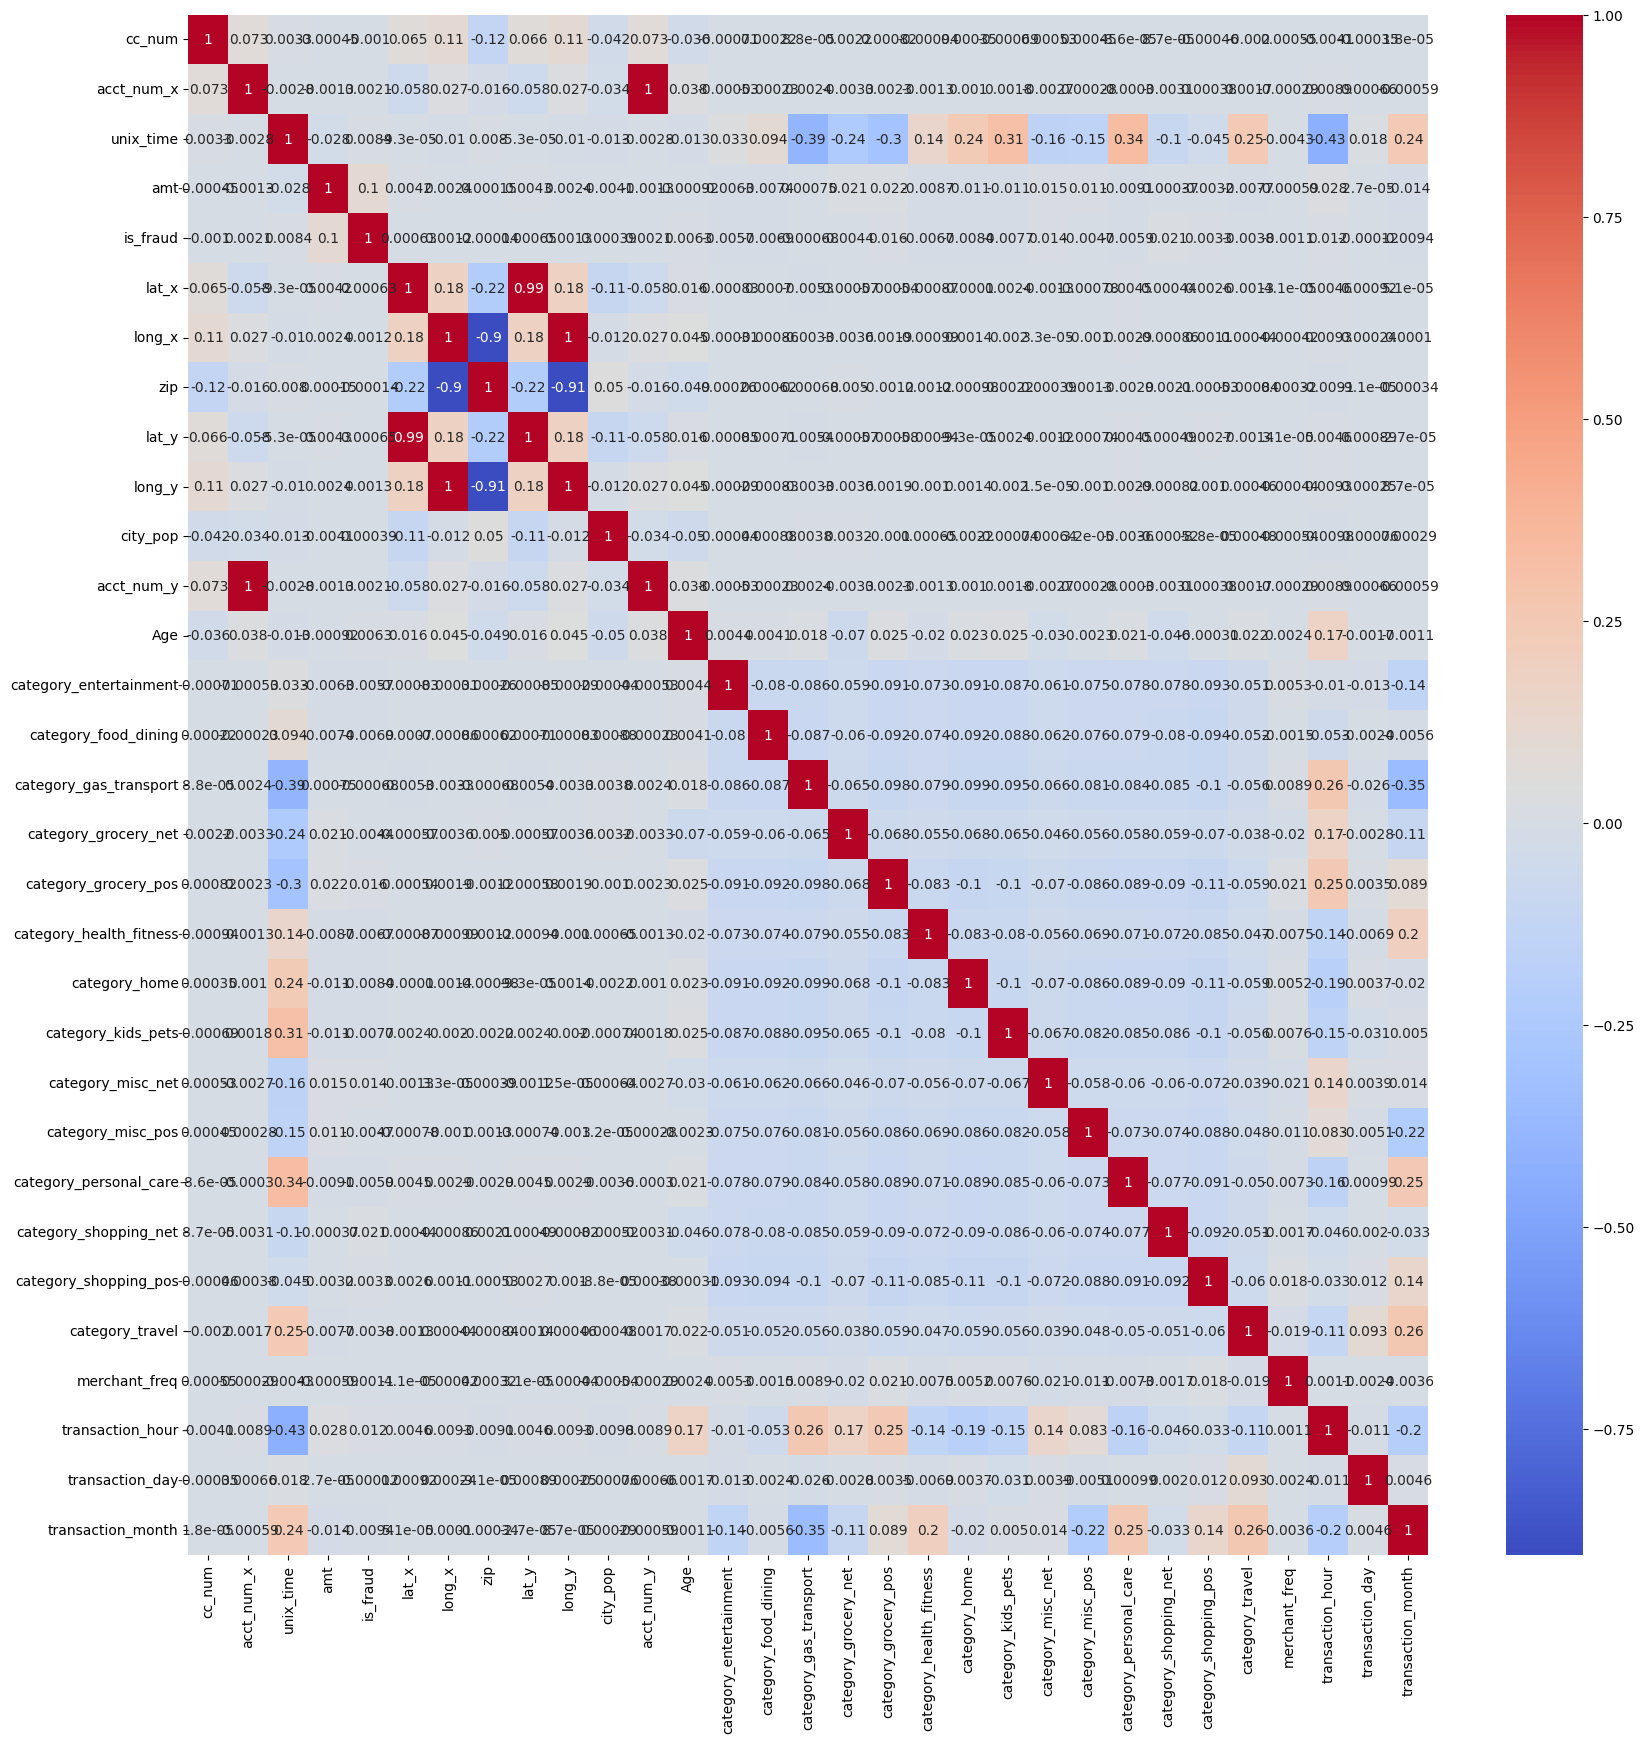

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(df_cor_matrix, cmap = "coolwarm", annot=True)

In [42]:
cor_with_label = df_cor_matrix['is_fraud']
cor_sorted = cor_with_label.sort_values(ascending=False)
cor_sorted

is_fraud                   1.000000
amt                        0.100302
category_shopping_net      0.020891
category_grocery_pos       0.016338
category_misc_net          0.013615
transaction_hour           0.012034
unix_time                  0.008443
Age                        0.006267
category_shopping_pos      0.003345
acct_num_y                 0.002145
acct_num_x                 0.002145
long_y                     0.001255
long_x                     0.001230
lat_y                      0.000646
lat_x                      0.000628
city_pop                   0.000392
transaction_day           -0.000122
zip                       -0.000143
category_gas_transport    -0.000677
cc_num                    -0.000996
merchant_freq             -0.001112
category_travel           -0.003844
category_grocery_net      -0.004448
category_misc_pos         -0.004716
category_entertainment    -0.005683
category_personal_care    -0.005904
category_health_fitness   -0.006671
category_food_dining      -0

In [43]:
choosen_features = ['cc_num',
 'acct_num_x',
 'unix_time',
 'amt',
 'lat_x',
 'long_x',
 'zip',
 'lat_y',
 'long_y',
 'city_pop',
 'acct_num_y',
 'Age',
 'category_entertainment',
 'category_food_dining',
 'category_gas_transport',
 'category_grocery_net',
 'category_grocery_pos',
 'category_health_fitness',
 'category_home',
 'category_kids_pets',
 'category_misc_net',
 'category_misc_pos',
 'category_personal_care',
 'category_shopping_net',
 'category_shopping_pos',
 'category_travel',
 'merchant_freq',
 'transaction_hour',
 'transaction_day',
 'transaction_month']

### 4. Feature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

In [45]:
split_df[choosen_features] = standard_scaler.fit_transform(split_df[choosen_features])
split_df[choosen_features].head()

,cc_num,acct_num_x,unix_time,amt,lat_x,long_x,zip,lat_y,long_y,city_pop,...,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,merchant_freq,transaction_hour,transaction_day,transaction_month
0,-0.237361,1.019294,-1.549297,0.089434,0.528477,1.099459,-1.499889,0.627429,1.052159,-0.471624,...,-0.216845,-0.266077,-0.275795,-0.278984,-0.331044,-0.182155,0.361523,0.680566,1.030399,-0.339273
1,-0.237361,1.019294,-1.285401,-0.122321,0.704816,1.042813,-1.499889,0.627429,1.052159,-0.471624,...,-0.216845,-0.266077,-0.275795,-0.278984,-0.331044,-0.182155,-0.274153,0.376726,0.352237,0.830755
2,-0.237361,1.019294,-1.847205,0.012145,0.780667,1.037568,-1.499889,0.627429,1.052159,-0.471624,...,-0.216845,-0.266077,-0.275795,-0.278984,-0.331044,-0.182155,-0.328253,1.136327,-0.212897,-1.509301
3,-0.237361,1.019294,-1.781317,-0.166937,0.449318,1.037335,-1.499889,0.627429,1.052159,-0.471624,...,-0.216845,-0.266077,-0.275795,-0.278984,-0.331044,-0.182155,-0.321491,0.832486,-0.099870,-1.216794
4,-0.237361,1.019294,-1.731165,-0.032161,0.598087,1.063029,-1.499889,0.627429,1.052159,-0.471624,...,-0.216845,-0.266077,-0.275795,-0.278984,-0.331044,-0.182155,-0.351246,0.984407,-1.117113,-0.924287


In [46]:
X = split_df[choosen_features]
y = split_df['is_fraud']

### Unsupervised Learning Models

In [47]:
from sklearn.cluster import KMeans, DBSCAN, MeanShift, AgglomerativeClustering
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

#### **KMeans**

In [48]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
split_df['kmeans_cluster'] = kmeans_labels

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x7cb16c59f130> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

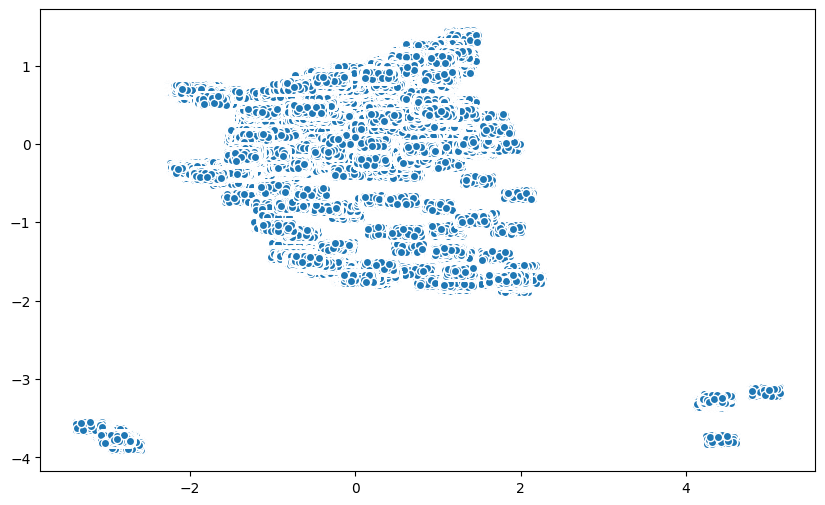

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lat_x', y='long_x', hue='kmeans_cluster', data=split_df, palette='viridis')
plt.title('KMeans Clustering of Transactions')
plt.show()

In [ ]:
centroids = kmeans.cluster_centers_
centroids = standard_scaler.inverse_transform(centroids)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lat_x', y='long_x', hue='kmeans_cluster', data=split_df, palette='viridis')
plt.scatter(centroids[:, choosen_features.index('lat_x')], centroids[:, choosen_features.index('long_x')], 
            s=300, c='red', label='Centroids')
plt.title('KMeans Clustering with Centroids')
plt.legend()
plt.show()


#### **KMeans Applying PCA**

In [39]:
pca = PCA(n_components=3)
pca_df = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3'])

explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component: ", explained_variance)

pc_df = pd.DataFrame({
    'pc': ['PC1', 'PC2', 'PC3'],
    'exp_variance': explained_variance
})

alt.Chart(pc_df).mark_line().encode(
    x=alt.X('pc:N'),
    y='exp_variance:Q'
).properties(width=600)

Explained variance by each component:  [0.08996095 0.05730572 0.05252691]


alt.Chart(...)

In [40]:
cluster_df = pd.DataFrame()
inertia_list = []

cluster_df['nb_cluster'] = range(1, 21)

for k in cluster_df['nb_cluster']:
    kmeans = KMeans(n_clusters=k, random_state=8).fit(pca_df)
    inertia_list.append(kmeans.inertia_)

cluster_df['inertia'] = inertia_list

alt.Chart(cluster_df).mark_line().encode(
    x='nb_cluster',
    y='inertia'
)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

alt.Chart(...)

In [50]:
k = 4

kmeans = KMeans(random_state=1, n_clusters=k)
kmeans.fit(pca_df)

pca_df['kmeans'] = kmeans.predict(pca_df)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


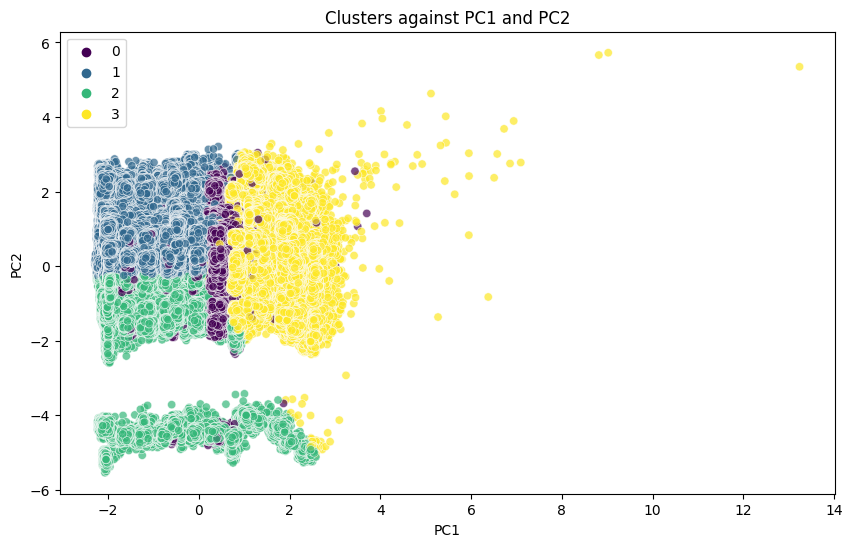

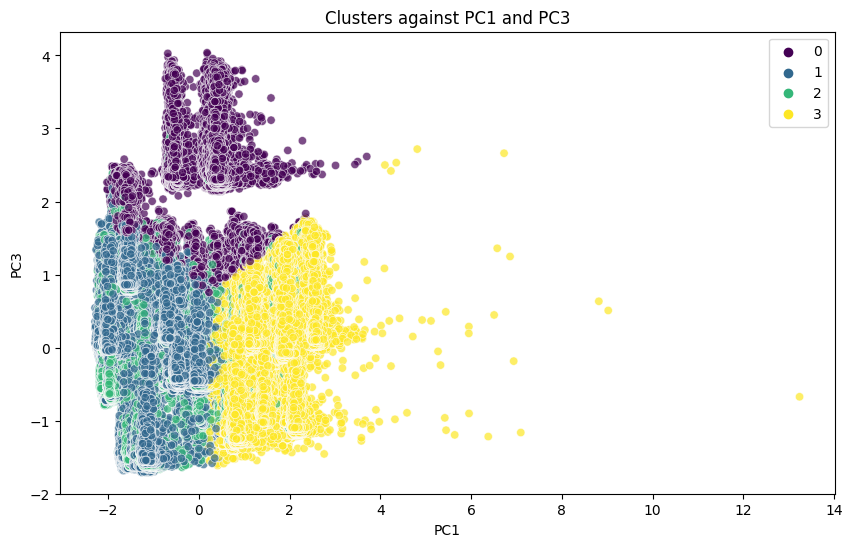

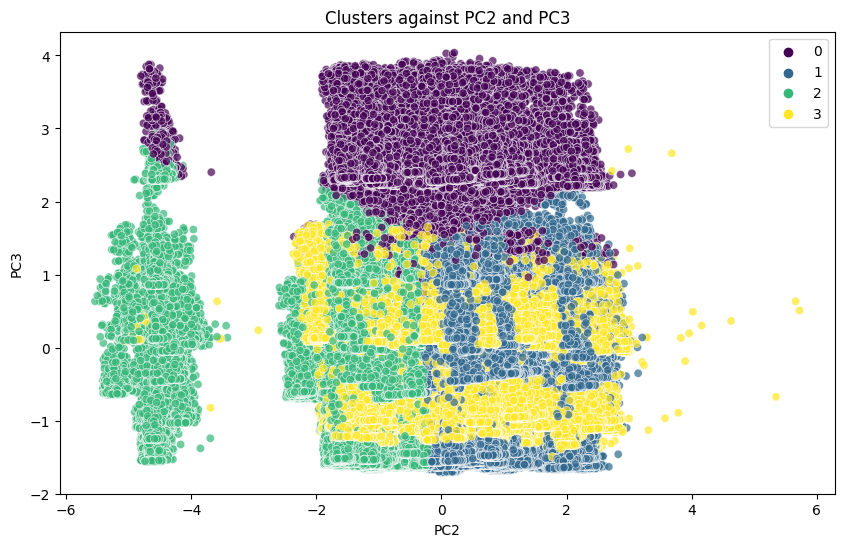

In [51]:
def plot_clusters(df, x, y, hue, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x, y=y, hue=hue, palette='viridis', alpha=0.7)
    plt.title(title)
    plt.legend(loc='best')
    plt.show()

plot_clusters(pca_df, 'PC1', 'PC2', 'kmeans', 'Clusters against PC1 and PC2')

plot_clusters(pca_df, 'PC1', 'PC3', 'kmeans', 'Clusters against PC1 and PC3')

plot_clusters(pca_df, 'PC2', 'PC3', 'kmeans', 'Clusters against PC2 and PC3')

In [ ]:
split_df['kmeans'] = pca_df['kmeans']

cluster_averages = split_df.groupby('kmeans').mean()
cluster_averages

In [ ]:
from sklearn.metrics import silhouette_score


kmeans_labels = kmeans.predict(X)

silhouette_avg = silhouette_score(X, kmeans_labels)

print(f"Silhouette Score: {silhouette_avg}")


pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2'])
pca_df['kmeans'] = kmeans_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='kmeans', palette='viridis', alpha=0.7)
plt.title('KMeans Clustering PCA Visualization')
plt.show()

print(f"Inertia: {kmeans.inertia_}")


#### **Isolation Forest for Anomaly Detection**

In [40]:
ifr = IsolationForest(random_state=0).fit(X)

preds = ifr.predict(X)

num_anomalies = (preds == -1).sum()
print(f"Number of anomalies detected: {num_anomalies}")


Number of anomalies detected: 53103


In [41]:
split_df['anomaly'] = preds

anomaly_mask = split_df['anomaly'] == -1

anomaly_stats = split_df[anomaly_mask].describe()
print("Descriptive statistics for anomalies:")
print(anomaly_stats)

normal_stats = split_df[~anomaly_mask].describe()
print("Descriptive statistics for normal observations:")
print(normal_stats)

Descriptive statistics for anomalies:
             cc_num      acct_num     unix_time           amt      is_fraud  \
count  53103.000000  53103.000000  53103.000000  53103.000000  53103.000000   
mean       1.342770      0.103283     -0.402749      1.259534      0.010583   
std        1.789233      1.164199      1.088771      4.086492      0.102330   
min       -0.308944     -1.687555     -1.948934     -0.420076      0.000000   
25%       -0.306825     -1.139152     -1.463906     -0.216952      0.000000   
50%       -0.304203      0.323217     -0.603825      0.097142      0.000000   
75%        3.256039      1.212200      0.727663      0.946866      0.000000   
max        3.624018      1.753188      1.377089    156.477651      1.000000   

                lat          long  category_entertainment  \
count  53103.000000  53103.000000            53103.000000   
mean       0.133414     -1.019600                0.057330   
std        2.048626      1.783965                1.088300   
min   

In [42]:
pca = PCA(n_components=2).fit(X)

pc_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio: {pc_variance_ratio}")

pca_df = pd.DataFrame(pca.transform(X), columns=['PC1', 'PC2'])

pca_df['anomaly'] = split_df['anomaly']

Explained variance ratio: [0.09002711 0.05748244]


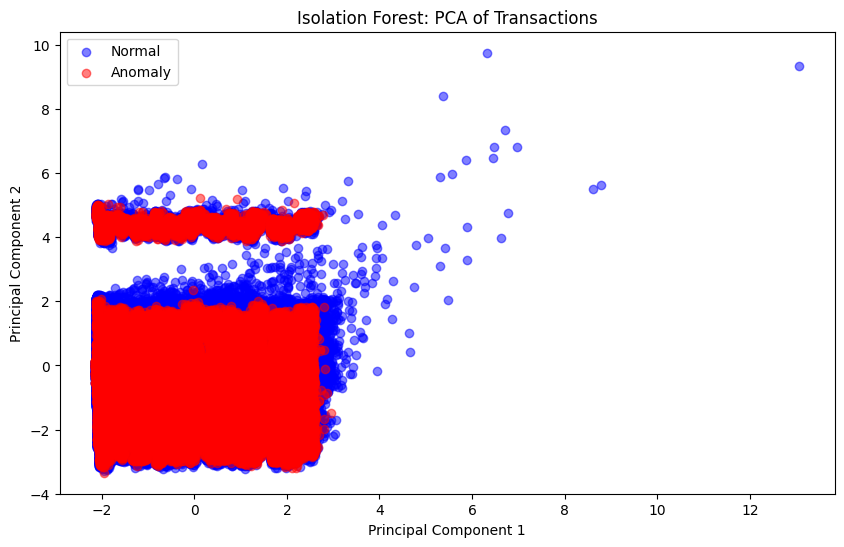

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_df[pca_df['anomaly'] == 1]['PC1'], pca_df[pca_df['anomaly'] == 1]['PC2'], 
            c='blue', label='Normal', alpha=0.5)
plt.scatter(pca_df[pca_df['anomaly'] == -1]['PC1'], pca_df[pca_df['anomaly'] == -1]['PC2'], 
            c='red', label='Anomaly', alpha=0.5)
plt.title('Isolation Forest: PCA of Transactions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [ ]:
class_new = split_df['is_fraud'].values
preds = ifr.predict(X)

binary_preds = np.where(preds == -1, 1, 0)

accuracy = accuracy_score(class_new, binary_preds)
precision = precision_score(class_new, binary_preds)
recall = recall_score(class_new, binary_preds)
f1 = f1_score(class_new, binary_preds)
roc_auc = roc_auc_score(class_new, binary_preds)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"AUC-ROC: {roc_auc}")

ConfusionMatrixDisplay.from_predictions(class_new, binary_preds, normalize='true')
plt.show()


#### **Mean-Shift**

In [102]:
X_temp = X.head(10000)

In [103]:
def batch_process_meanshift(X, batch_size):
    n_samples = X.shape[0]
    labels = np.full(n_samples, -1)
    cluster_centers = []
    
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        X_batch = X[start:end]
        
        meanshift = MeanShift()
        meanshift.fit(X_batch)
        
        batch_labels = meanshift.predict(X_batch)
        labels[start:end] = batch_labels + len(cluster_centers)
        
        if len(cluster_centers) == 0:
            cluster_centers = meanshift.cluster_centers_
        else:
            cluster_centers = np.vstack([cluster_centers, meanshift.cluster_centers_])
    
    return labels, cluster_centers

In [104]:
batch_size = 50000
split_df['meanshift_batch'], cluster_centers = batch_process_meanshift(X, batch_size)

KeyboardInterrupt: 

In [100]:
def plot_clusters(df, x, y, hue, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x, y=y, hue=hue, palette='viridis', alpha=0.7)
    plt.title(title)
    plt.legend(loc='best')
    plt.show()

In [96]:
feat_list = ['lat_x', 'long_x', 'amt']
pairs = [(a, b) for idx, a in enumerate(feat_list) for b in feat_list[idx + 1:]]

for a, b in pairs:
    plot_clusters(split_df, a, b, 'meanshift_batch', f'Scatter plot of {a} vs {b}')

ValueError: Could not interpret value `meanshift_batch` for parameter `hue`

<Figure size 1000x600 with 0 Axes>

In [ ]:
cluster_averages = split_df.groupby('meanshift_batch').mean()
cluster_averages


#### **Hierarchical Clustering (AgglomerativeClustering) with Dendrogram**


In [93]:
def batch_processing_agglomerative(X_temp, batch_size):
    n_samples = X_temp.shape[0]
    clusters = np.zeros(n_samples)
    labels = np.full(n_samples, -1)
    
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        X_batch_temp = X_temp[start:end]
        
        model = AgglomerativeClustering(n_clusters=5)
        batch_labels = model.fit_predict(X_batch_temp)
        labels[start:end] = batch_labels + len(np.unique(labels[labels >= 0]))
    
    return labels

In [94]:
batch_size = 1000

X_temp['aggcluster_batch'] = batch_processing_agglomerative(X_temp, batch_size)

/tmp/ipykernel_34/2188697960.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_temp['aggcluster_batch'] = batch_processing_agglomerative(X_temp, batch_size)


In [101]:
feat_list = ['lat_x', 'long_x', 'amt']
pairs = [(a, b) for idx, a in enumerate(feat_list) for b in feat_list[idx + 1:]]

for a, b in pairs:
    plot_clusters(split_df, a, b, 'aggcluster_batch', f'Scatter plot of {a} vs {b}')

ValueError: Could not interpret value `aggcluster_batch` for parameter `hue`

<Figure size 1000x600 with 0 Axes>

In [ ]:
sample_X = X[:5000]
sample_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
sample_model.fit(sample_X)

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.show()

plot_dendrogram(sample_model)

#### **DBSCAN**

In [106]:
def batch_process_dbscan(X, batch_size, eps=0.5, min_samples=5):
    n_samples = X.shape[0]
    labels = np.full(n_samples, -1)
    
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        X_batch = X[start:end]
        
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        batch_labels = dbscan.fit_predict(X_batch)
        
        if start != 0:
            batch_labels[batch_labels != -1] += (labels.max() + 1)
        
        labels[start:end] = batch_labels
    
    return labels


In [ ]:
batch_size = 500000
split_df['dbscan_batch'] = batch_process_dbscan(X, batch_size)

In [ ]:
feat_list = ['lat_x', 'long_x', 'amt']
pairs = [(a, b) for idx, a in enumerate(feat_list) for b in feat_list[idx + 1:]]

for a, b in pairs:
    plot_clusters(split_df, a, b, 'dbscan_batch', f'Scatter plot of {a} vs {b}')

In [ ]:
cluster_averages = split_df.groupby('dbscan_batch').mean()
cluster_averages

#### **Local Outlier Factor**

In [ ]:
X_normal = X[split_df['is_fraud'] == 0]
X_new = X

lof = LocalOutlierFactor(n_neighbors=21, novelty=True).fit(X_normal)

preds = lof.predict(X_new)


In [ ]:
class_new = split_df['is_fraud'].values

accuracy = accuracy_score(class_new, preds)
print(f"Accuracy Score: {accuracy}")

ConfusionMatrixDisplay.from_predictions(class_new, preds, normalize='true')
plt.show()